## 221501138 - SIVABALAN T

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss,adfuller

In [121]:
data = {
    "date": pd.date_range(start="2025-01-01", periods=15),
    "temperature": [30, 32, np.nan, 35, 120, 33, np.nan, 15, 31, 29, 200, 28, np.nan, 30, 32]
}

In [122]:
df = pd.DataFrame(data)

In [123]:
df.set_index("date",inplace=True)

In [124]:
df["temperature"] = df.temperature.interpolate()

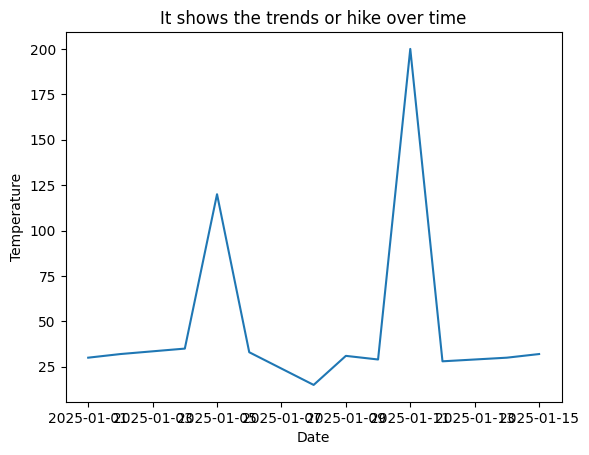

In [125]:
plt.plot(df.temperature)
plt.title("It shows the trends or hike over time")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

In [126]:
def kpss_test(series):
  statistic, p_value, n_lags, critical_values = kpss(series, regression="c",nlags=3)
  print(f"KPSS Statistic: {statistic}")
  print(f"p-value: {p_value}")
  if p_value < 0.05:
    print("Reject null hypothesis and the data point is non-stationary")
  else:
    print("Failed to Reject null hypothesis and the data point is stationary")

In [127]:
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

    if result[1] < 0.05:
        print("The series is likely stationary.")
    else:
        print("The series is likely non-stationary.")

In [128]:
kpss_test(df['temperature']) # Look up table out of range, so am using adf_test for this data

KPSS Statistic: 0.11354469117362803
p-value: 0.1
Failed to Reject null hypothesis and the data point is stationary


<ipython-input-126-b531e05269ef>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, regression="c",nlags=3)


In [129]:
adf_test(df['temperature'])

ADF Statistic: 1.7159984017901155
p-value: 0.9981670140374544
Critical values:
   1%: -4.473135048010974
   5%: -3.28988060356653
   10%: -2.7723823456790124
The series is likely non-stationary.


In [130]:
def plot_rolling_stats(timeseries, window=3):
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()
    rolling_mean.dropna(inplace=True)
    rolling_std.dropna(inplace=True)
    plt.figure(figsize=(10, 5))
    plt.plot(timeseries, color='blue', label='Original Data')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

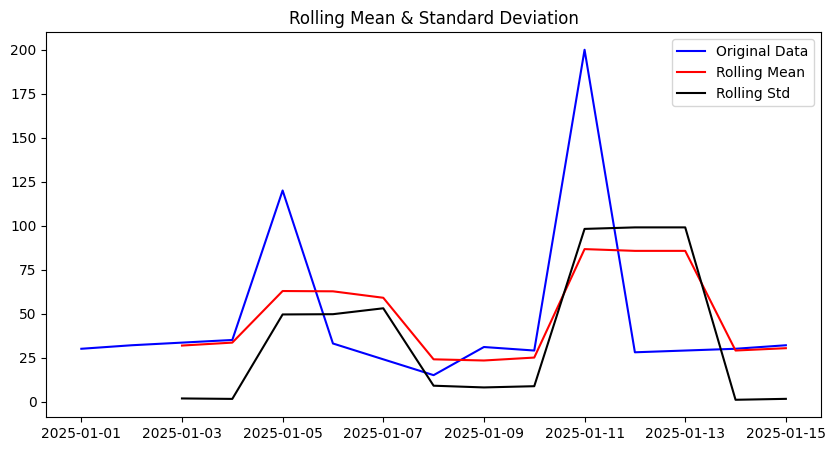

In [131]:
plot_rolling_stats(df["temperature"])

In [132]:
df_diff = df - df.shift(1)
df_diff.dropna(inplace=True)
df_diff2 = df_diff - df_diff.shift(1)
df_diff2.dropna(inplace=True)
adf_test(df_diff2["temperature"])

ADF Statistic: -13.714430811267295
p-value: 1.2204390006387503e-25
Critical values:
   1%: -4.6651863281249994
   5%: -3.3671868750000002
   10%: -2.802960625
The series is likely stationary.
